# Prismen und Gitterspektrometer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 0. Messwerte

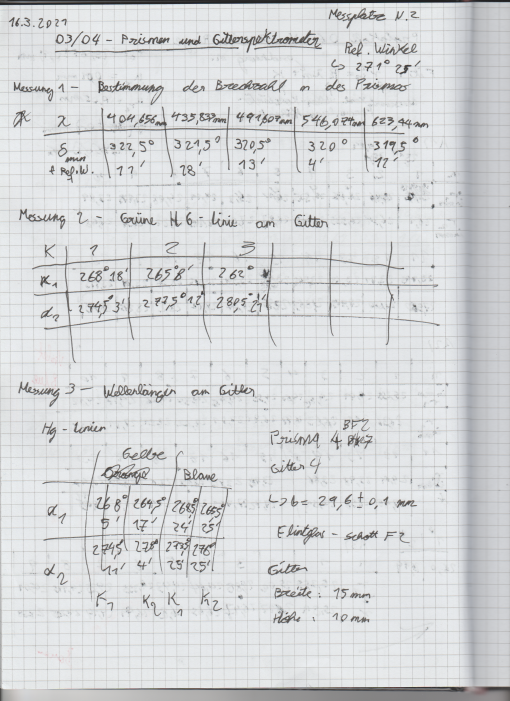

In [20]:
from IPython.display import Image
Image(filename='Messwerte.png') 

In [3]:
#Konstanten
ref_angle = 271+25*1/60 #in grad
b = 0.0296 #in m
g_breite = 0.015 #in m
g_laenge = 0.01  #in m
gamma = 60 #in grad

In [4]:
ref_angle

271.4166666666667

In [5]:
#minimaler Ablenkungswinkel delta und Wellenlängen x
delta = np.array([322.5+11*1/60,321.5+28*1/60,320.5+13*1/60,320+4*1/60,319.5+12*1/60])-ref_angle #in grad
u_delta = 0.1 #maximale Ableseunsicherheit am Nonius nach Betracht auch von der Unschärfe der Emissionslinien 
x = np.array([404.656,435.833,491.607,546.074,623.44]) #in nm
#Gitter-Maxima
delta_alpha = np.array([262,265+8*1/60,268+18*1/60,274.5+3*1/60,277.5+12*1/60,280.5+21*1/60])-ref_angle #in grad
k = np.array([-3,-2,-1,1,2,3])
#Wellenlänge gelbe Hg-Linie am Gitter
delta_alpha_1 = np.array([264.5+17*1/60,268+5*1/60,274.5+11*1/60,278+4*1/60])-ref_angle #in grad
k_well = np.array([-2,-1,1,2])
#Wellenlänge blaue Hg-Linie am Gitter 
delta_alpha_2 = np.array([265.5+25*1/60,268.5+24*1/60,273.5+25*1/60,276+25*1/60])-ref_angle #in grad

In [6]:
delta

array([51.26666667, 50.55      , 49.3       , 48.65      , 48.28333333])

In [7]:
delta_alpha_1

array([-6.63333333, -3.33333333,  3.26666667,  6.65      ])

In [8]:
delta_alpha_2

array([-5.5       , -2.51666667,  2.5       ,  5.        ])

# Teil 1. Prisma

## Fit der Dispersionskurve $n(\lambda)$

Für die Dispersionskurve eines Prismas kann ein Fit mit einer Sellmeier-Gleichung 1.Ordnung <br>
$n(\lambda)= \sqrt{A+\sum^1_{i=0} \frac{B_i \cdot \lambda ^2}{\lambda ^2 - C_i}} = \sqrt{A+ \frac{B \cdot \lambda ^2}{\lambda ^2 - C}}$ <br>
$u_{n(\lambda)}= \sqrt{ \left(\frac{u_A}{2 \sqrt{A+ \frac{B \cdot \lambda ^2}{\lambda ^2 - C}}}  \right)^2+ \left(\frac{u_B \cdot \frac{\lambda^2}{\lambda ^2 -C}}{2 \sqrt{A+ \frac{B \cdot \lambda ^2}{\lambda ^2 - C}}}  \right)^2 + \left(\frac{u_C \cdot \frac{B \cdot \lambda ^2}{(\lambda ^2 -C)^2}}{2 \sqrt{A+ \frac{B \cdot \lambda ^2}{\lambda ^2 - C}}}  \right)^2}$ <br>
als Modelfunktion erstellt werden.

In [9]:
def sellmeier_2nd_order(x, A, B1, B2, C1, C2): #konvergiert bei nur 5 Messpunkten nicht zuverlässig
    n = np.sqrt(A+B1*x**2/(x**2-C1)+B2*x**2/(x**2-C2))
    return n
def sellmeier(x, A, B1, C1):
    n = np.sqrt(A+B1*x**2/(x**2-C1))
    return n
def u_sellmeier(x, a, b, c, u_a, u_b, u_c):
    u_A = u_a/(2*np.sqrt(a+b*x**2/(x**2-c)))
    u_B = u_b*x**2/(x**2-c)/(2*np.sqrt(a+b*x**2/(x**2-c)))
    u_C = u_c*b*x**2/((x**2-c)**2)/(2*np.sqrt(a+b*x**2/(x**2-c)))
    u_ges = np.sqrt(u_A**2+u_B**2+u_C**2)
    return u_ges

Die Brechungswerte $n$, nach denen die Sellmeier Modelfunktion gefittet werden kann, sind nach Formel <br>
$n = \frac{sin \frac{1}{2}(\delta _{min} + \gamma)}{sin \frac{1}{2} \gamma}$ <br>
aus den gemessenen Parametern für die minimale Ablenkung $\delta _{min} (\lambda)$ berechnet worden. <br>
Für die gaußsche Fehlerfortplfanzung aus den Messunsicherheiten folgt dann <br>
$u_n = \sqrt{ \left(\frac{cos \frac{1}{2}(\delta _{min} + \gamma)}{sin \frac{1}{2} \gamma} \cdot u_{\delta _{min}}\right)^2+ \left( \left(\frac{cos \frac{1}{2}(\delta _{min} + \gamma)}{sin \frac{1}{2} \gamma}- \frac{sin \frac{1}{2}(\delta _{min} + \gamma)}{sin^2 \frac{1}{2} \gamma}\cdot cos\frac{1}{2}\gamma \right) \cdot u_{\gamma} \right) ^2}$

In [10]:
def n(y, u_delta):        #gamma und u_gamma sind konstant
    gamma = 60*2*np.pi/360
    u_gamma = 0
    delta = y*2*np.pi/360
    n = np.sin(1/2*(delta+gamma))/np.sin(1/2*gamma)
    u_n = np.sqrt((np.cos(1/2*(gamma+delta))/np.sin(1/2 * gamma)*u_delta*2*np.pi/360)**2+((np.cos(1/2*(gamma+delta))/np.sin(1/2 * gamma)-np.sin(1/2*(gamma+delta))/np.sin(1/2 * gamma)**2 *np.cos(1/2*gamma))*u_gamma)**2)
    return n, u_n

[1.65088409 1.64379114 1.63126601 1.62467613 1.6209357 ] [3.84349333e-05 3.93355572e-05 4.09652933e-05 4.18439059e-05
 4.23493719e-05]
A = 2.3136945180662947 +/- 0.2746777417719065
B = 0.26352267488134834 +/- 0.25658463401015563
C = 59447.75058136543 +/- 32966.148378148006


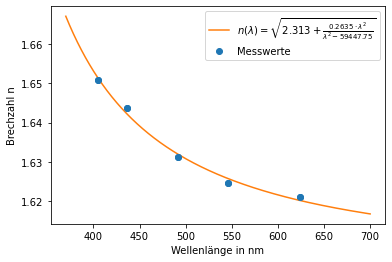

In [11]:
x = np.array([404.656,435.833,491.607,546.074,623.44]) #in nm
y, u_y = n(delta,u_delta/delta)
print(y, u_y)
plt.scatter(x,y, label="Messwerte")
plt.errorbar(x, y, yerr=u_y,fmt='o')
fit_parameters, fit_cov = curve_fit(sellmeier,x,y)
fit_uncertainties = (fit_cov[0,0]**0.5,fit_cov[1,1]**0.5,fit_cov[2,2]**0.5)
x = np.arange(370,700,0.1)
plt.plot(x,sellmeier(x,*fit_parameters), label= r'$n(\lambda) =\sqrt{2.313 + \frac{0.2635  \cdot \lambda ^2}{\lambda ^2 - 59447.75 }}$')
plt.xlabel("Wellenlänge in nm")
plt.ylabel("Brechzahl n")
plt.legend(loc="upper right")
plt.savefig("DispersionFit.pdf")
print("A =", fit_parameters[0], "+/-", fit_uncertainties[0])
print("B =", fit_parameters[1], "+/-", fit_uncertainties[1])
print("C =", fit_parameters[2], "+/-", fit_uncertainties[2])

R^2 = 0.992883364140061


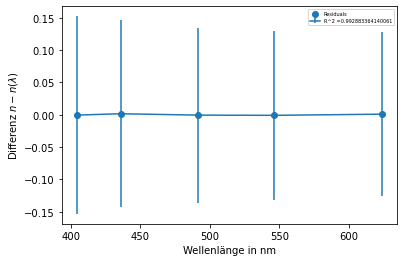

In [12]:
x = np.array([404.656,435.833,491.607,546.074,623.44]) #in nm
residuals = y- sellmeier(x, *fit_parameters)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label="Residuals")
plt.errorbar(x,residuals,u_sellmeier(x, *fit_parameters, *fit_uncertainties), label='R^2 ='+str(R_2))
plt.xlabel("Wellenlänge in nm")
plt.ylabel("Differenz "r'$n-n(\lambda)$')
plt.legend(loc="upper right", prop={'size': 5})
#plt.rcParams["figure.figsize"] = (8,1)
#plt.savefig("DispersionRes.pdf", bbox_inches = "tight")
print("R^2 =", R_2)

In [13]:
u_sellmeier(x, *fit_parameters, *fit_uncertainties)

array([0.1528312 , 0.14419026, 0.13538033, 0.13056668, 0.1265621 ])

## Auflösungsvermögen $\lambda / \Delta \lambda$

Das Auflösungsvermögen $\frac{\lambda}{\Delta \lambda}$ eines Prismas kann aus der Basislänge b des Prismas und dem Anstieg $\frac{dn}{d \lambda}$ der gefitteten Dispersionskurve ausgerechnet werden. Dieser ist dann gegeben als <br>
$\frac{\lambda}{\Delta \lambda} = -b \frac{dn}{d\lambda }$ <br>

In [14]:
def res(x, fit_paramaters, fit_uncertainties):
    h = 1e-6
    b = 0.0296*1e9
    u_b = 0.0001
    dndx = (sellmeier(x+h, *fit_parameters)-sellmeier(x, *fit_parameters))/h
    res = -b * dndx
    u_res = np.sqrt((-(sellmeier(x+h, *fit_parameters)-sellmeier(x, *fit_parameters))/h*u_b)**2+(dndx*u_sellmeier(x, *fit_parameters, *fit_uncertainties)*b)**2)
    return res, u_res

In [15]:
res(590, fit_parameters, fit_uncertainties)

(2024.1653686525751, 259.1334186305705)

# Teil 2. Gitter

## Gitterkonstante g und Wellenlänge $\lambda$

Für den Gitter kann die charakteristische Gitterkonstante g ausgerechnet werden aus einem Fit für den Beugungswinkel Beugungswinkel $\alpha$ mit einer bekannten Wellenlänge $\lambda$ sowie Ordnung $k$ des Maximums mit der Modelfunktion <br>
$sin(\alpha _k)= \frac{k \lambda}{g}$ <br>
Es wird die bekannte grüne Hg-Linie von $\lambda = 546.074nm$ verwendet.

In [16]:
def sin_alpha(k,g):
    x = 546.074 #in nm
    sin = k*x/g
    return sin

g = 9997.77021724495 +/- 7.11053252774207 nm


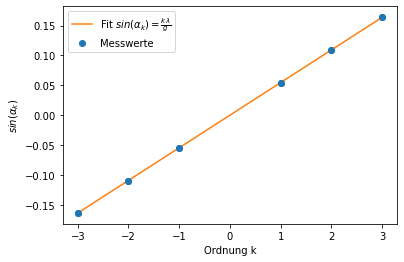

In [17]:
sin_data = np.sin(delta_alpha*2*np.pi/360)
plt.scatter(k,sin_data, label="Messwerte")
plt.errorbar(k,sin_data, yerr=u_delta*2*np.pi/360,fmt='o')
fit_parameters, fit_cov = curve_fit(sin_alpha,k,sin_data)
fit_uncertainties = fit_cov[0,0]**0.5
k_x = np.arange(-3,3.1,0.1)
plt.plot(k_x,sin_alpha(k_x,*fit_parameters), label="Fit "r'$sin(\alpha _k)= \frac{k \lambda}{g}$')
plt.xlabel("Ordnung k")
plt.ylabel(r'$sin(\alpha _k)$')
plt.legend(loc="upper left")
plt.savefig("Gitterkonstante.pdf")
print("g =", *fit_parameters, "+/-", fit_uncertainties, "nm")

Bei bekannter Gitterkonstante g kann dann ebenfalls die Wellenlänge $\lambda$ unter einen gemessenen Beugungswinkel $\alpha$ mit den selben Fit bestimmt werden <br>

In [18]:
def sin_alpha_well(k,x):
    g = 9997.77 #in nm
    u_g = 8.747
    sin = k*x/g
    return sin

Die Wellenlänge der gelben Hg-Linie ist lambda = 577.6372720901213 +/- 1.6623751102928814 nm
Die Wellenlänge der blauen Hg-Linie ist lambda = 453.43123730243565 +/- 12.122896005228279 nm


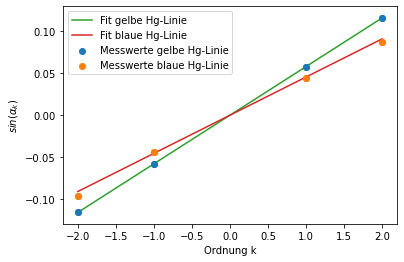

In [19]:
#Gelbe Hg Linie
sin_data_1 = np.sin(delta_alpha_1*2*np.pi/360)
sin_data_2 = np.sin(delta_alpha_2*2*np.pi/360)
plt.scatter(k_well,sin_data_1,label="Messwerte gelbe Hg-Linie")
plt.scatter(k_well,sin_data_2,label="Messwerte blaue Hg-Linie")
plt.errorbar(k_well,sin_data_1, yerr=u_delta*2*np.pi/360,fmt='o')
plt.errorbar(k_well,sin_data_2, yerr=u_delta*2*np.pi/360,fmt='o')
fit_parameters_1, fit_cov_1 = curve_fit(sin_alpha_well,k_well,sin_data_1)
fit_parameters_2, fit_cov_2 = curve_fit(sin_alpha_well,k_well,sin_data_2)
fit_uncertainties_1 = fit_cov_1[0,0]**0.5
fit_uncertainties_2 = fit_cov_2[0,0]**0.5
k_x = np.arange(-2,2.1,0.1)
plt.plot(k_x,sin_alpha_well(k_x,*fit_parameters_1),label="Fit gelbe Hg-Linie")
plt.plot(k_x,sin_alpha_well(k_x,*fit_parameters_2),label="Fit blaue Hg-Linie")
plt.xlabel("Ordnung k")
plt.ylabel(r'$sin(\alpha _k)$')
plt.legend(loc="upper left")
plt.savefig("Wellenlaengen.pdf")
print("Die Wellenlänge der gelben Hg-Linie ist lambda =", *fit_parameters_1, "+/-", fit_uncertainties_1, "nm")
print("Die Wellenlänge der blauen Hg-Linie ist lambda =", *fit_parameters_2, "+/-", fit_uncertainties_2, "nm")